## Generate confusion matrix from Weka result

### Load ARFF file

In [1]:
from scipy.io import arff
import pandas as pd

# Note: use the ARFF file produced by Weka
data = arff.loadarff('!!!path to ARFF file here!!!')
df = pd.DataFrame(data[0])

# Predicted quality is a real number. Round it to the nearest
# .5 to have an equivalent to the original quality label.
df['predictedQualityBin'] = round(df['predictedQuality']*2)/2
df['actual_str'] = [str(x) for x in df['Quality']]
df['pred_str'] = [str(x) for x in df['predictedQualityBin']]
df['id'] = df.index

df.head()


,RectCoverage,AvgRectArea,RectStDev,AspectRatio,AvgLineBends,AvgLineLength,LongestLine,ShortestLine,LineLengthStDev,AvgLineAngle,...,RectOrth,RectOrth2,rectangles,lines,predictedQuality,Quality,predictedQualityBin,actual_str,pred_str,id
0,0.162199,0.021583,0.203015,0.116477,0.00,0.051654,0.048455,0.014955,0.470332,0.097108,...,0.000130,0.590625,0.098361,0.027778,4.1275,3.5,4.0,3.5,4.0,0
1,0.573817,0.140077,0.123532,0.193005,0.00,0.049527,0.024226,0.069745,0.055487,0.003463,...,0.000080,0.270000,0.049180,0.027778,3.9300,4.5,4.0,4.5,4.0,1
2,0.653908,0.165791,0.123904,0.262142,0.10,0.048248,0.031988,0.031551,0.246294,0.001938,...,0.000054,0.000000,0.065574,0.055556,3.7750,4.0,4.0,4.0,4.0,2
3,0.502048,0.227716,0.257905,0.215160,0.00,0.113320,0.066333,0.103787,0.197791,0.000000,...,0.000028,0.000000,0.049180,0.027778,3.5200,3.5,3.5,3.5,3.5,3
4,0.241633,0.472394,0.232859,0.122882,0.25,0.436494,0.268640,0.376125,0.296865,0.000000,...,0.000004,0.472500,0.131148,0.013889,3.4650,4.0,3.5,4.0,3.5,4


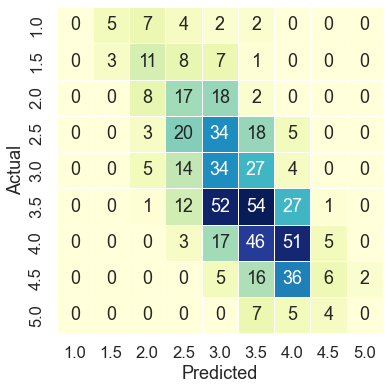

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error as fmae

sns.set(style='white', context='talk')
plt.rcParams['font.family'] = 'sans-serif'
plt.figure(1, figsize=(6,6))

classes = [f"{(x+2)/2:.1f}" for x in range(9)]
cm = confusion_matrix(df['actual_str'], df['pred_str'], labels=classes)

sns.heatmap(cm, 
  annot=True, 
  fmt='d', 
  cmap='YlGnBu', 
  linewidths=1, 
  cbar=False, 
  square=True,
  xticklabels=classes,
  yticklabels=classes,
)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()